In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

In [2]:
#df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df = pd.read_csv("binary.csv")

In [3]:
df.head()

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

In [4]:
#RENAMING THE RANK COLUMN
df.columns = ["admit", "gre", "gpa", "prestige"]
df.head()
#df.shape

admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4

In [5]:
pd.crosstab(df["admit"],df["prestige"],rownames = ["admit"])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12

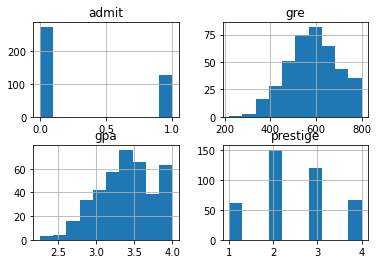

In [6]:
df.hist()
pl.show()

In [7]:
dummy_ranks = pd.get_dummies(df["prestige"], prefix = "prestige")

In [8]:
dummy_ranks.head()

prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1

In [9]:
# CREATING A CLEAN DATA FRAME
cols_to_keep = ["admit", "gre", "gpa"]
data = df[cols_to_keep].join(dummy_ranks.loc[:,"prestige_2":])
data.head()

admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1

In [12]:
#ADDING THE INTERCEPT MANUALLY
data["intercept"] = 1.0
data.head()

admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0      0  380  3.61           0           1           0        1.0
1      1  660  3.67           0           1           0        1.0
2      1  800  4.00           0           0           0        1.0
3      1  640  3.19           0           0           1        1.0
4      0  520  2.93           0           0           1        1.0

In [13]:
train_cols = data.columns[1:]

logit = sm.Logit(data["admit"], data[train_cols])

In [14]:
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [15]:
ironman = results.predict([800,4,0,0,0,1.0])

In [16]:
print(ironman)

[0.73840825]


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                 0.08292
Time:                        17:53:25   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""